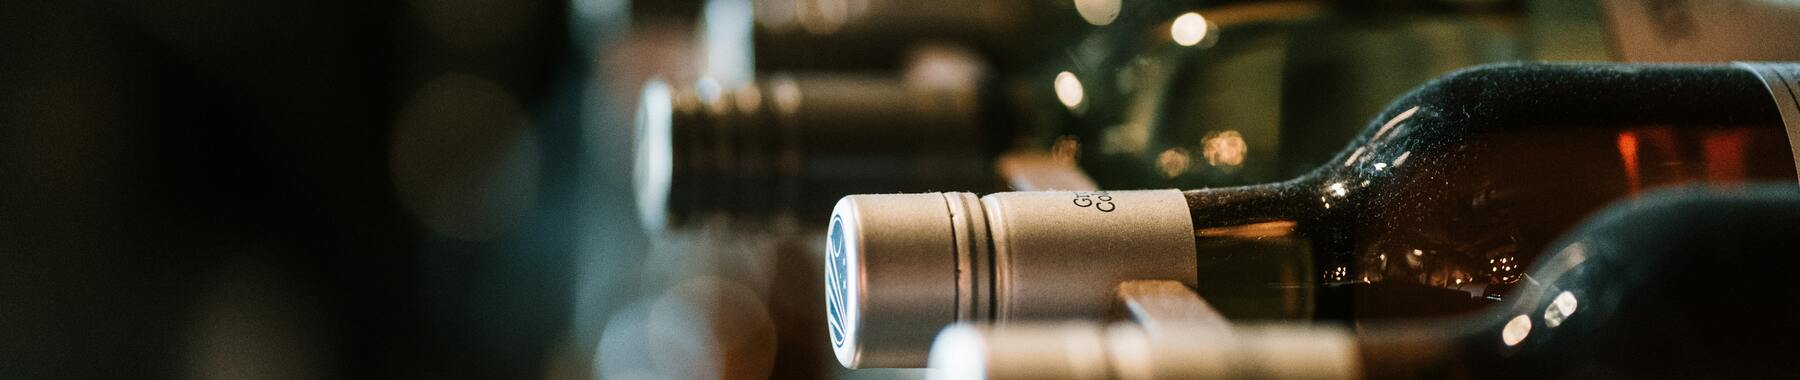

# BUSINESS UNDERSTANDING

[Tipos de vinho](https://www.vmvinhos.com.br/tipos-de-vinho)

# DATA UNDERSTANDING

Cluster de vinhos com base em seus constituintes químicos<br>

[Dataset](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

In [1]:
# METADADOS:

# Title

In [12]:
# Agrupamento de tipos de vinhos com base em seus constituintes químicos

# Head

In [2]:
# Machine Learning - AGRUPAMENTO - Agrupamento de tipos de vinhos
# by geanclm on 21/12/2023

# Local files

In [4]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\kaggle\Wine

21/12/2023  18:29    <DIR>          .
21/12/2023  18:18    <DIR>          ..
21/12/2023  18:21    <DIR>          .ipynb_checkpoints
21/12/2023  18:28           301.842 AGRUPAMENTO_Wine_Kaggle_csv.ipynb
21/12/2023  18:28            11.089 wine-clustering.csv
               2 arquivo(s)        312.931 bytes
               3 pasta(s)   839.229.857.792 bytes dispon¡veis


# Library installation

In [7]:
# !pip install ydata-profiling

# Import libs

In [5]:
import pandas as pd
import numpy as np

# gerar gráficos
import matplotlib.pyplot as plt

# Load data

In [6]:
df = pd.read_csv('wine-clustering.csv')

# Exploratory Analysis

In [7]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [10]:
df.dtypes.value_counts()

float64    11
int64       2
Name: count, dtype: int64

In [11]:
df.isnull().sum().sort_values(ascending=False)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# DATA PREPARATION

In [13]:
df.isnull().sum().sort_values(ascending=False)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# DATA FRAME somente colunas numéricas

In [44]:
# selecionar somente as colunas numéricas da base para filtrar somente dados numéricas
col_df_train_nr = df_train.columns[df_train.dtypes != 'object']
col_df_test_nr = df_test.columns[df_test.dtypes != 'object']

In [45]:
# DATA FRAME somente com as colunas numéricas - df_train e df_test
df_train_nr = df_train.loc[:,col_df_train_nr]
df_test_nr = df_test.loc[:,col_df_test_nr]

In [46]:
df_train_nr.tail(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_bin,Embarked_C,Embarked_Q,Embarked_S
888,889,0,3,0.000000,1,2,-0.176263,1,0,0,1
889,890,1,1,-0.284663,0,0,-0.044381,0,1,0,0
890,891,0,3,0.177063,0,0,-0.492378,0,0,1,0


In [47]:
df_test_nr.tail(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_bin,Embarked_C,Embarked_Q,Embarked_S
415,1307,3,0.651965,0,0,-0.508792,1,0,0,1
416,1308,3,0.000000,0,0,-0.494448,1,0,0,1
417,1309,3,0.000000,1,1,-0.237906,1,1,0,0


In [48]:
df_train.shape, df_test.shape

((891, 13), (418, 12))

# DATA VISUALIZATION

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            DATA VISUALIZATION
        </b>
    <br/>&nbsp;
</center>

In [49]:
# Passageiros com menos de 1 ano de idade
# QUESTIONAMENTO by geanclm: as idades em float podem interfir no modelo? Não seria melhor converter para inteiro e padronizar essa coluna?
(df_train_nr[df_train_nr['Age']<1])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_bin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,-0.592481,1,0,-0.502445,0,0,0,1
1,2,1,1,0.638789,1,0,0.786845,1,1,0,0
2,3,1,3,-0.284663,0,0,-0.488854,1,0,0,1
3,4,1,1,0.407926,1,0,0.420730,1,0,0,1
4,5,0,3,0.407926,0,0,-0.486337,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.207709,0,0,-0.386671,0,0,0,1
887,888,1,1,-0.823344,0,0,-0.044381,1,0,0,1
888,889,0,3,0.000000,1,2,-0.176263,1,0,0,1
889,890,1,1,-0.284663,0,0,-0.044381,0,1,0,0


In [50]:
df_train_nr['Sex_bin'].value_counts()

Sex_bin
0    577
1    314
Name: count, dtype: int64

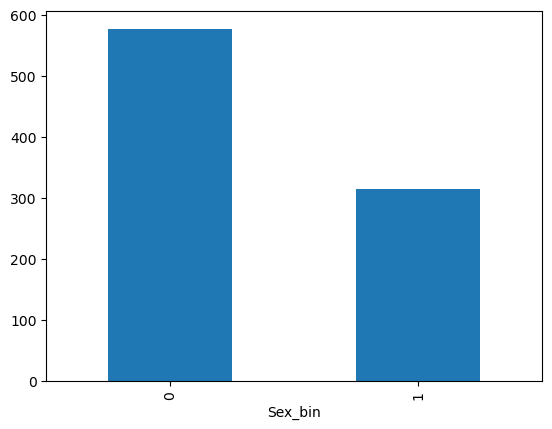

In [51]:
# Quantitativo de passageiros de acordo com o gênero
df_train_nr['Sex_bin'].value_counts().plot.bar();

In [52]:
df_train_nr['Sex_bin'].value_counts().sum()

891

In [53]:
# Quantidade de oassageiros agrupados por gênero e sobreviventes
# 0 - homens
# 1 - mulheres
df_train_nr.groupby(["Sex_bin","Survived"])["PassengerId"].count()

Sex_bin  Survived
0        0           468
         1           109
1        0            81
         1           233
Name: PassengerId, dtype: int64

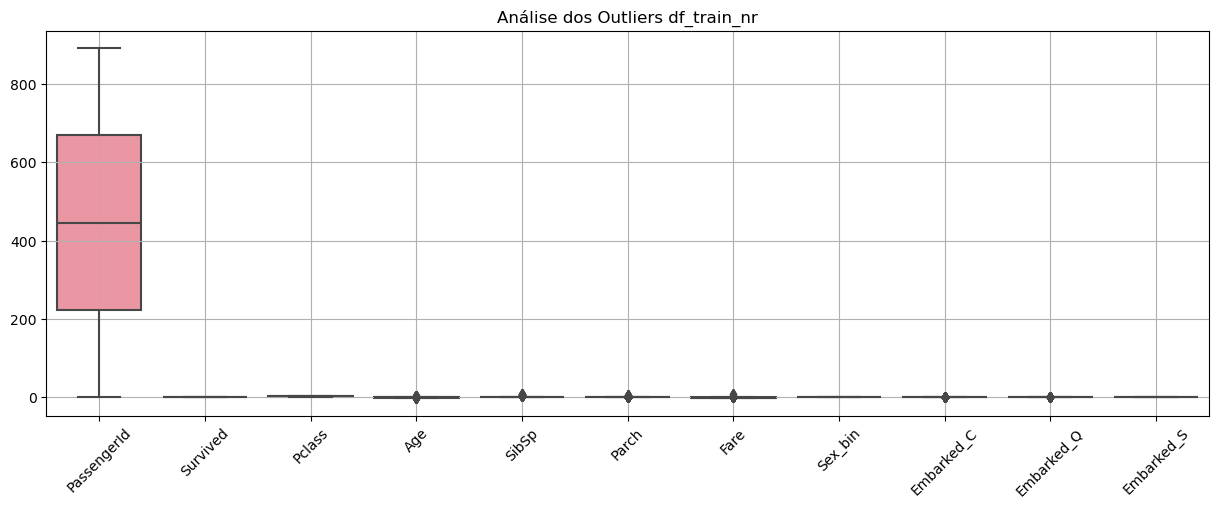

In [54]:
# Análise dos outliers - df_train colunas númericas
plt.figure(figsize=(15,5))
ax = sns.boxplot(data = df_train_nr)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(f'Análise dos Outliers df_train_nr')
plt.grid()
plt.show();

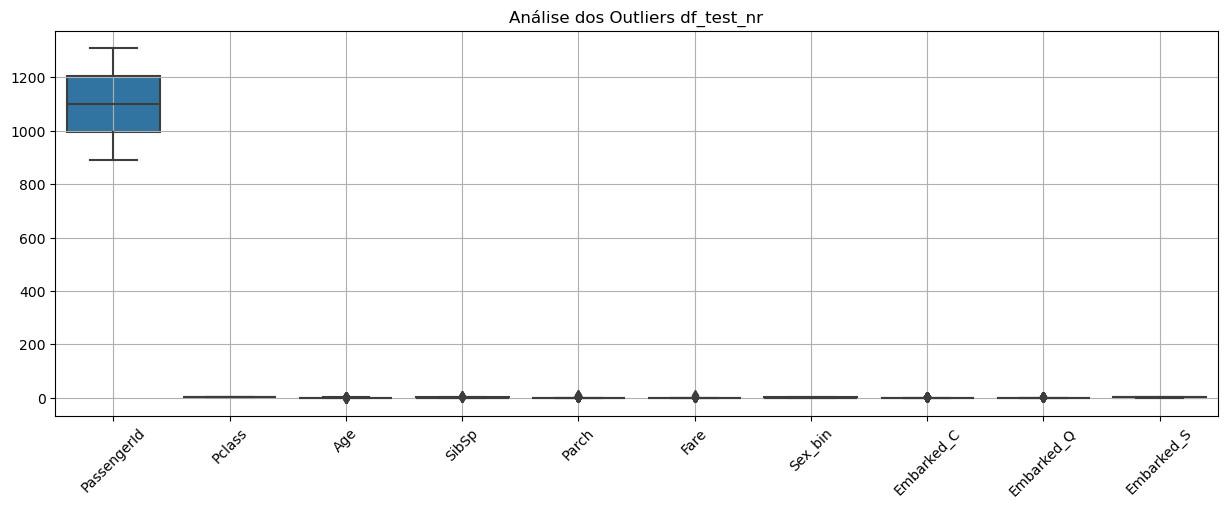

In [55]:
# Análise dos outliers - df test colunas numéricas
plt.figure(figsize=(15,5))
ax = sns.boxplot(data = df_test_nr)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(f'Análise dos Outliers df_test_nr')
plt.grid()
plt.show();

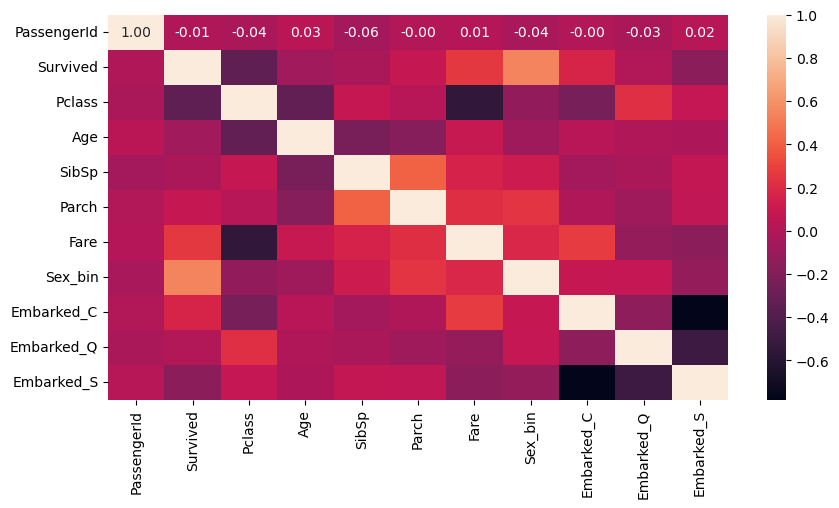

In [56]:
# Análise da correlação entre as variáveis
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_train_nr.corr(), annot=True, fmt='.2f')
plt.show()

# ENTENDO O MÓDULO sklearn.model_selection

In [57]:
# Gerar uma série numérica de 10 números inteiros
X_praticar_lib = np.arange(10)
X_praticar_lib

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
# Aplicar a função para dividir a base de dados na proporção de trinta porcento para teste e setenta para treino
train_test_split(X_praticar_lib, test_size=0.3)

[array([2, 3, 8, 6, 4, 7, 5]), array([0, 9, 1])]

# SEPARANDO VARIÁVEIS "df_train_nr" em TREINO e TESTE

In [59]:
# Base treino numérica
X = df_train_nr.drop(['PassengerId','Survived'], axis=1)
y = df_train_nr.Survived

In [60]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.3)

In [57]:
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape

((623, 9), (268, 9), (623,), (268,))

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Support Vector Machines (SVM)
        </b>
    <br/>&nbsp;
</center>

[Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)

In [58]:
# Treinar o modelo
# params = {
#     'C': np.logspace(-7,7,10,base=2),
#     'class_weight': [None, 'balanced'],
# }
# svc = SVC(kernel='linear')
# grid_svc = GridSearchCV(
#     svc, params,
#     cv=5,
#     scoring='roc_auc',
#     verbose=10
# )
svm = SVC(kernel='linear')

In [59]:
svm.fit(X_tr, y_tr)

SVC(kernel='linear')

In [60]:
svm_y_pred = svm.predict(X_ts)

In [61]:
# MATRIZ CONFUSÃO
svm_confusion_matrix = confusion_matrix(y_ts, svm_y_pred)

# ACURÁCIA
svm_accuracy_score = accuracy_score(y_ts, svm_y_pred)

# PRECISION
svm_precision_score = precision_score(y_ts, svm_y_pred)

# RECALL (SENSIBILIDADE)
svm_recall_score = recall_score(y_ts, svm_y_pred)

# F1 SCORE
svm_f1_score = f1_score(y_ts, svm_y_pred)

# 0.7611940298507462
np.mean(y_ts == svm_y_pred)

0.8097014925373134

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            KNeighbors Classifier
        </b>
    <br/>&nbsp;
</center>

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [62]:
# Treinar o modelo
# validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)
params = {
    'n_neighbors': np.arange(3, 11, 2)
}
neigh = GridSearchCV(
    KNeighborsClassifier(),
    params,                                    
    cv=10,
    scoring='roc_auc',
#     verbose=5,
)
# bagging_neigh = BaggingClassifier(estimator=neigh, n_estimators=100)

In [63]:
neigh.fit(X_tr, y_tr)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 5, 7, 9])},
             scoring='roc_auc')

In [64]:
neigh_y_pred = neigh.predict(X_ts)

In [65]:
# MATRIZ CONFUSÃO
neigh_confusion_matrix = confusion_matrix(y_ts, neigh_y_pred)

# ACURÁCIA
neigh_accuracy_score = accuracy_score(y_ts, neigh_y_pred)

# PRECISION
neigh_precision_score = precision_score(y_ts, neigh_y_pred)

# RECALL (SENSIBILIDADE)
neigh_recall_score = recall_score(y_ts, neigh_y_pred)

# F1 SCORE
neigh_f1_score = f1_score(y_ts, neigh_y_pred)

# 0.7611940298507462
np.mean(y_ts == neigh_y_pred)

0.8171641791044776

# Logistic Regression

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Logistic Regression
        </b>
    <br/>&nbsp;
</center>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [66]:
# # Treinar o modelo
# # validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)
# params = {
#     'max_iter': np.arange(1500, 2000, 500)
# }
# lr = GridSearchCV(
#     LogisticRegression(),
#     params,                                    
#     cv=10,
#     scoring='roc_auc',
# #     verbose=5,
# )
# # bagging_lr = BaggingClassifier(estimator=lr, n_estimators=100)

In [19]:
# bagging_lr.fit(X_tr, y_tr)
# lr.fit(X_tr, y_tr)

In [68]:
# lr_y_pred = bagging_lr.predict(X_ts)
# lr_y_pred = lr.predict(X_ts)

In [20]:
# # MATRIZ CONFUSÃO
# lr_confusion_matrix = confusion_matrix(y_ts, lr_y_pred)

# # ACURÁCIA
# lr_accuracy_score = accuracy_score(y_ts, lr_y_pred)

# # PRECISION
# lr_precision_score = precision_score(y_ts, lr_y_pred)

# # RECALL (SENSIBILIDADE)
# lr_recall_score = recall_score(y_ts, lr_y_pred)

# # F1 SCORE
# lr_f1_score = f1_score(y_ts, lr_y_pred)

# # 0.8022388059701493
# np.mean(y_ts == lr_y_pred)

# Sumission para o Kaggle - 2

In [21]:
# aplicar a submissão com o melhor modelo do projeto com base nas métricas
# model = rfc

In [22]:
# X_test = df_test_nr.drop(['PassengerId', 'Survived'], axis=1)

In [ ]:
# X_test.tail(3)

In [ ]:
# y_pred = model.predict(X_test)

In [ ]:
# df_test_nr['Survived'] = y_pred

In [23]:
# df_test_nr.tail()

In [ ]:
# sub = df_test_nr[['PassengerId','Survived']]

In [ ]:
# sub.shape

In [ ]:
# # Salvar com o nome do arquivo atual em variável para salvar a predição com mesmo nome
# # by geanclm on 16/12/2023
# file_path = os.getcwd()
# for _, _, arquivo in os.walk(file_path):
#     # print(arquivo)
#     file = arquivo[2][:35]
# # - - -
# current_date = datetime.today().strftime('%Y-%m-%d')
# # - - -
# file_name = f'{file}{current_date}.csv'
# # sub.to_csv(file_name, header=True, index=False)
# sub.to_csv(file_name, header=True, index=False)

In [ ]:
# file_name

In [ ]:
# !type gender_submission.csv
# !type {file_name}

# INSHIGHTS

In [ ]:
# 1 - eliminar registros com dado de idade faltante
# 2 - arredondar idade
# 3 - converter coluna Age para inteiro
# 4 - Importante pensar em TREINO, VALIDAÇÃO e TESTE com a base existente
# 5 - Meta de atingir pelo menos 0.9 de avaliação no Kaggle